## The "Curse" of Dimensionality

The probability that a point selected in random will end up within a small distance `eps` from the boundary of a unit hypercube with `n` sides (or *dimensions*). 

In [1]:
def proba(n, eps=0.001, side=1):
  vol_cube=side**n
  vol_inner=(side-2*eps)**n
  vol_boundary=vol_cube-vol_inner
  p=vol_boundary/vol_cube
  return p*100

In [2]:
[proba(n) for n in range(1, 11)]

[0.20000000000000018,
 0.39959999999999996,
 0.5988007999999989,
 0.7976031983999987,
 0.9960079920032006,
 1.1940159760191915,
 1.391627944067153,
 1.5888446881790252,
 1.7856669988026597,
 1.9820956648050614]

In [3]:
proba(10_000)

99.9999997979714

In [4]:
import numpy as np

In [5]:
def dist(n, n_repeat=1_000):
  d=[]
  for i in range(n_repeat):
    x1=np.random.rand(n)
    x2=np.random.rand(n)
    d12=np.sqrt(((x2-x1)**2).sum())
    d.append(d12)
  d=np.array(d)
  return d.mean()

In [6]:
dist(3)

0.6638364745213824

In [7]:
# This cell takes about 20 sec to run
dist(1_000_000)

408.2484749535478

In [8]:
dist(100)

4.081513710405438

Data points in a high dimensional data set are far away from each other -- *sparsity*.

You can try increasing the number of features to reduce sparsity. For example, let's say you have 100 features (less than the number of features in the MNIST data set) and would like these features to be within 0.1 distance of each other. Roughly, you will need this many training instances:

In [9]:
(1/0.1)**100

1e+100

The number of atoms in the observable universe is smaller than that!

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist['data'], mnist['target'].astype(np.uint8)

In [17]:
X.shape

(70000, 784)

In [13]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X95=pca.fit_transform(X)

In [15]:
pca.n_components_

154

In [16]:
X95.shape

(70000, 154)

In [21]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [31]:
%%time

sm_no_pca=Pipeline([
                    ('scaler', StandardScaler()),
                    ('smax', LogisticRegression(tol=100))
                    ])

sm_no_pca.fit(X_train, y_train)
y_pred_no_pca=sm_no_pca.predict(X_test)

print(accuracy_score(y_test, y_pred_no_pca))

0.9190952380952381
CPU times: user 12.5 s, sys: 1.12 s, total: 13.6 s
Wall time: 7.3 s


In [36]:
%%time

sm_pca=Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=0.95)),                 
                 ('smax', LogisticRegression(tol=100))
                 ])

sm_pca.fit(X_train, y_train)
y_pred_pca=sm_pca.predict(X_test)

print(accuracy_score(y_test, y_pred_pca))

0.9202380952380952
CPU times: user 25.1 s, sys: 2.51 s, total: 27.6 s
Wall time: 14.8 s


Let's load a lighter version of the handwritten digits data set (low resolution images).

In [46]:
from sklearn.datasets import load_digits
digits=load_digits()
X=digits['data']
y=digits['target']

In [49]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (1797, 64), (1797,))

In [50]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

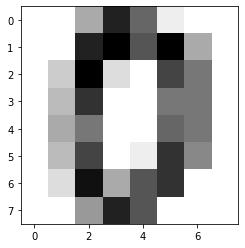

In [55]:
import matplotlib.pyplot as plt

img=X[0, :]
img=img.reshape((8, 8))
plt.imshow(img, cmap='binary')
plt.show()

In [58]:
pca=PCA()
pca.fit(X, y)
var=pca.explained_variance_ratio_
len(var)

64

In [59]:
var

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

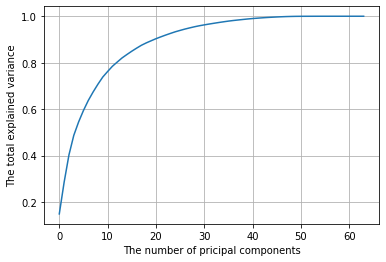

In [62]:
plt.plot(np.cumsum(var))
plt.xlabel("The number of pricipal components")
plt.ylabel("The total explained variance")
plt.grid()
plt.show()